Final parameters (theta):
[[9.95956946e-01]
 [8.02628795e-04]]
[0.3465298840647584, 0.10579943882549579, 0.08902405845582502, 0.07138537225057594, 1.594934544766952, 0.993525300017979, 0.5934076157169277, 0.45499638877560344, 0.3574064541831759, 0.3501156336090402, 0.25472642385901206, 0.2545259687146856, 0.18279542785640462, 0.17147397149694238, 0.10228043685006477, 0.10187268739368345, 0.09325574272023267, 0.04917818223144106, 0.04615517546602258, 0.028975745283275463, 0.008294454200676326, 0.0026757236021345628, 0.0020624081624243396, 0.001990153516961557, 0.006842616606902466, 0.0067120581382618585, 0.002754927152015641, 0.0007290940400995437, 0.0001327669148590261, 7.746357487090352e-06, 3.725111883693615e-06, 3.0485279855640654e-06, 1.5438723229585494e-06, 1.330765592652253e-06, 1.344462039257372e-06, 1.4435446594470527e-06, 1.954215335615338e-06, 2.7767953906148954e-06, 2.3546248073838293e-06, 1.7086533844852552e-06, 1.6762128703003384e-06, 5.810519784545813e-06, 2.7855472412630

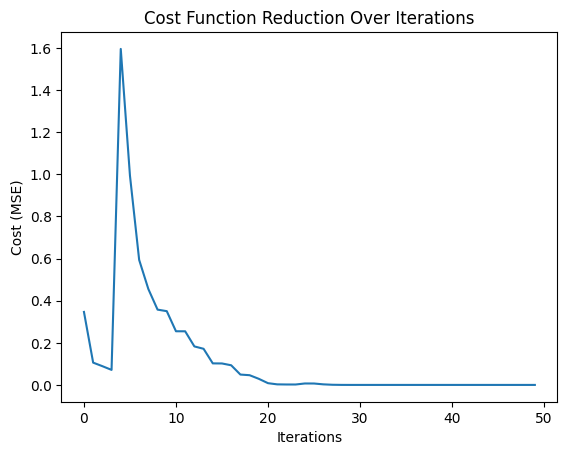

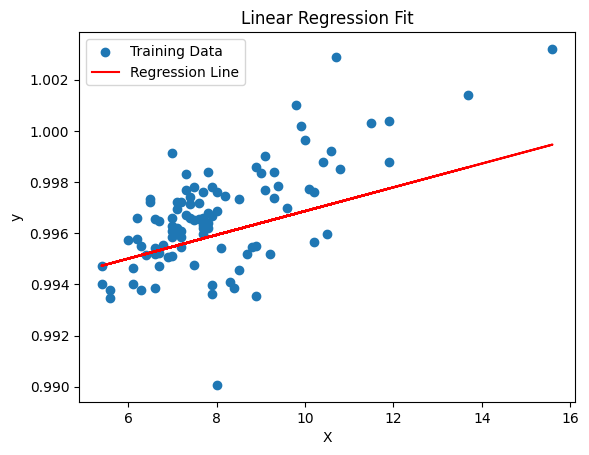

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


filepath1='/content/drive/My Drive/Colab Notebooks/linearX.csv'
filepath2='/content/drive/My Drive/Colab Notebooks/linearY.csv'


X_data = pd.read_csv(filepath1)
y_data = pd.read_csv(filepath2)


X = X_data.values.reshape(-1, 1)
y = y_data.values.reshape(-1, 1)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

import numpy as np

def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):

    m = len(y)
    cost_history=[]
    for _ in range(iterations):

        random_index = np.random.randint(0, m)
        X_i = X[random_index:random_index + 1]  # shape (1, n)
        y_i = y[random_index:random_index + 1]  # shape (1, 1)


        prediction = X_i.dot(theta)


        error = prediction - y_i

        theta -= learning_rate * X_i.T.dot(error)
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history



X_b = np.c_[np.ones((len(X_normalized), 1)), X_normalized]


theta = np.random.randn(2, 1)

learning_rate = 0.5
iterations = 50

theta_final, cost_history =  stochastic_gradient_descent(X_b, y, theta, learning_rate, iterations)

print("Final parameters (theta):")
print(theta_final)
print(cost_history)

plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function Reduction Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()


plt.scatter(X, y, label="Training Data")
X_fit = (X_normalized * X_std) + X_mean
plt.plot(X_fit, X_b.dot(theta_final), color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Final parameters (theta):
[[9.96541278e-01]
 [7.76614380e-04]]
[1.1433635066316672, 0.6313564419761745, 0.3552529137644471, 0.03034248499043865, 0.025528662627398682, 0.007510720072485553, 0.0031433675701865137, 0.002371310304640906, 0.0009851018768067968, 0.0007113239681712842, 7.730285114594107e-05, 4.0180154801562145e-05, 2.3843394619642663e-05, 2.8985221706028228e-06, 1.506038163304163e-06, 1.276483304941389e-06, 1.1825751111111114e-06, 1.1984631259249373e-06, 1.2539191981980146e-06, 1.2000672639317696e-06, 1.1898792068279093e-06, 1.2579467610800458e-06, 1.212465116307858e-06, 1.2215317467761473e-06, 1.184413764464943e-06, 1.1904770108107064e-06, 1.1919004088457903e-06, 1.2255576895118268e-06, 1.2401695033672322e-06, 1.2177964960542908e-06, 1.1879428542829915e-06, 1.1903606974329593e-06, 1.1874318320993967e-06, 1.2235962818631505e-06, 1.196652520347859e-06, 1.1885239250426966e-06, 1.1835771833983131e-06, 1.2478185662697111e-06, 1.290650505589665e-06, 1.203292303421971e-06, 1.292404

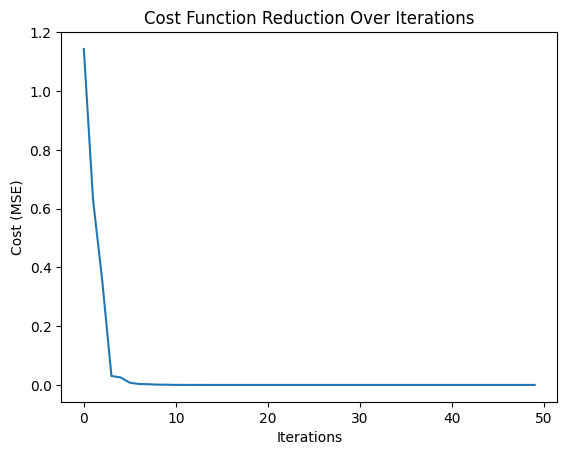

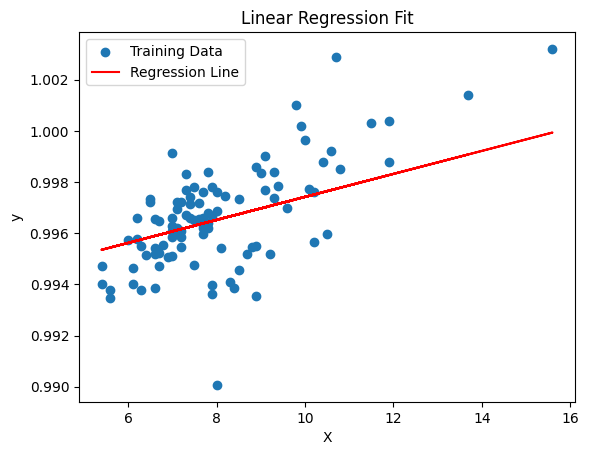

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load X and y from separate CSV files without column names
filepath1='/content/drive/My Drive/Colab Notebooks/linearX.csv'
filepath2='/content/drive/My Drive/Colab Notebooks/linearY.csv'


X_data = pd.read_csv(filepath1)  # No header, data is in the first column
y_data = pd.read_csv(filepath2)

#reshape into 2D arrays
X = X_data.values.reshape(-1, 1)  # Independent variable
y = y_data.values.reshape(-1, 1)  # Dependent variable

# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Function to compute mean squared error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

import numpy as np

def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Shuffle the dataset

            indices = np.random.choice(m, size=batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]

            # Compute predictions and gradients
            predictions = X_batch.dot(theta)
            gradients = (1 / batch_size) * X_batch.T.dot(predictions - y_batch)

            # Update theta
            theta -= learning_rate * gradients
            cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


# Add a bias term (intercept) to the normalized X
X_b = np.c_[np.ones((len(X_normalized), 1)), X_normalized]  # Add a column of ones for the intercept

# Initialize parameters (theta)
theta = np.random.randn(2, 1)  # 2 parameters: intercept and slope

# Set hyperparameters
learning_rate = 0.5
iterations = 50

# Perform gradient descent
theta_final, cost_history =  mini_batch_gradient_descent(X_b, y, theta, learning_rate, iterations,10)

# Print the results
print("Final parameters (theta):")
print(theta_final)
print(cost_history)

# Plot the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function Reduction Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

# Plot the data and regression line
plt.scatter(X, y, label="Training Data")
X_fit = (X_normalized * X_std) + X_mean  # Transform normalized X back to the original scale
plt.plot(X_fit, X_b.dot(theta_final), color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
